In [17]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [18]:
df = pd.read_csv(os.path.join("winequality-white.csv"))
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [19]:
y = df["quality"]
# target_names = ["negative", "positive"]

In [20]:
X = df[["volatile acidity", "sulphates", "total sulfur dioxide", "alcohol"]]
X.head()

,volatile acidity,sulphates,total sulfur dioxide,alcohol
0,0.27,0.45,170.0,8.8
1,0.30,0.49,132.0,9.5
2,0.28,0.44,97.0,10.1
3,0.23,0.40,186.0,9.9
4,0.23,0.40,186.0,9.9


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 0.999/0.594
k: 3, Train/Test Score: 0.730/0.492
k: 5, Train/Test Score: 0.655/0.501
k: 7, Train/Test Score: 0.617/0.500
k: 9, Train/Test Score: 0.598/0.485
k: 11, Train/Test Score: 0.586/0.489
k: 13, Train/Test Score: 0.570/0.495
k: 15, Train/Test Score: 0.568/0.491
k: 17, Train/Test Score: 0.552/0.495
k: 19, Train/Test Score: 0.551/0.495


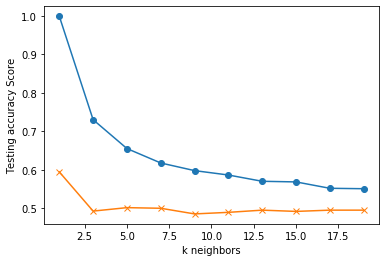

In [24]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [25]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.485


In [16]:
fig.savefig('graph.png')